<a href="https://colab.research.google.com/github/jeanfcf/unemployment-forecast-uk/blob/arimax/ARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ARIMAX


In [17]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%Y-%m')
data = pd.read_csv('/content/drive/MyDrive/Datasets/UK/UK-dataset.csv',parse_dates=['ANO'], index_col='ANO',date_parser=dateparse)
data = data.drop(['CASOS'], 1)
data = data.drop(['MORTES'], 1)
data = data.drop(['INFLACAO'], 1)
data = data.drop(['BANKRATE'], 1)
data = data.drop(['GDP'], 1)
data = data.drop(['LIBRA'], 1)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,DESEMPREGO
ANO,
1997-01-01,7.5
1997-02-01,7.3
1997-03-01,7.2
1997-04-01,7.2
1997-05-01,7.2


In [18]:
exogenous = pd.read_csv('/content/drive/MyDrive/Datasets/UK/UK-dataset.csv',parse_dates=['ANO'], index_col='ANO',date_parser=dateparse)
exogenous = exogenous.drop(['CASOS'], 1)
exogenous = exogenous.drop(['MORTES'], 1)
exogenous = exogenous.drop(['DESEMPREGO'], 1)
exogenous.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,INFLACAO,BANKRATE,GDP,LIBRA
ANO,,,,
1997-01-01,2.6,5.94,64.3701,1.6757
1997-02-01,2.4,5.94,65.2410,1.7126
1997-03-01,2.2,5.94,65.5841,1.7383
1997-04-01,2.1,5.94,65.7258,1.7268
1997-05-01,2.1,6.25,65.2434,1.7564


In [19]:
prmodel = auto_arima(data,X=exogenous,m=12,trace=3,error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-562.354, Time=2.87 sec
First viable model found (-562.354)
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-512.593, Time=0.19 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-544.066, Time=1.81 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-531.051, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-510.613, Time=0.23 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-563.188, Time=2.34 sec
New best model found (-563.188 < -562.354)
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-558.450, Time=1.07 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-562.794, Time=5.99 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-561.911, Time=2.68 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-561.542, Time=6.87 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-564.107, Time=2.28 sec
New best model found (-564.107 < -563.188)
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-560.385, Time=1.06 sec
 ARIMA(1,1,2)(1,0,1)[12] interc

In [21]:
prmodel.aic()

-570.9574653692199

In [22]:
train = data.loc['1997-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

In [23]:
xtrain = exogenous.loc['1997-01-01':'2016-12-01']
xtest = exogenous.loc['2017-01-01':]

In [24]:
prmodel.fit(train,X=xtrain)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [25]:
xforecast = prmodel.predict(n_periods=51,X=xtest)

In [26]:
xfuture = pd.DataFrame(xforecast,index=test.index,columns=['#DESEMPREGO'])

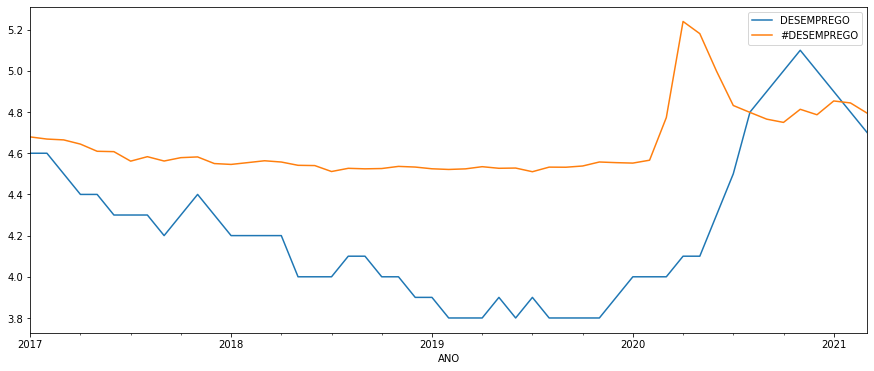

In [27]:
pd.concat([test,xfuture],axis=1).plot()

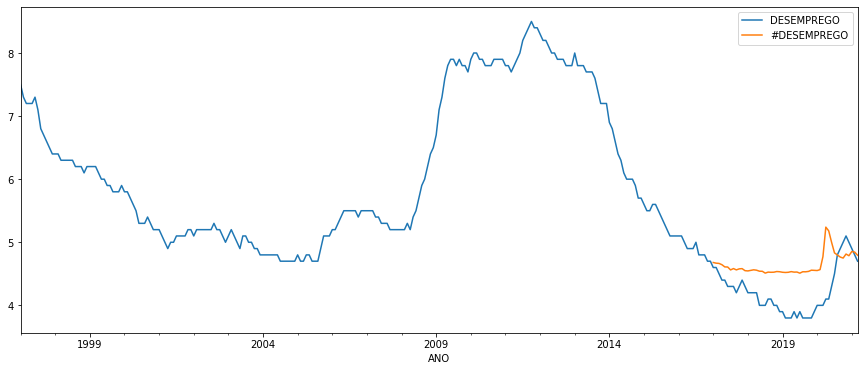

In [28]:
pd.concat([data,xfuture],axis=1).plot()

In [31]:
def mape(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_Predicted - Y_actual)/Y_Predicted))*100
    return mape
mse = mean_squared_error(test,xfuture)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(test,xfuture)
mape = mape(test,xfuture)
r2 = metrics.r2_score(test,xfuture)
print("MAE", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R-Squared:", r2)

MAE 0.44803082046485415
MSE: 0.2699264241848266
RMSE: 0.5195444390856537
MAPE: #DESEMPREGO   NaN
DESEMPREGO    NaN
dtype: float64
R-Squared: -1.034656666390581


In [ ]:
def mape(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_Predicted - Y_actual)/Y_Predicted))*100
    return mape
mse = mean_squared_error(test.DESEMPREGO,preds_svr)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(test.DESEMPREGO,preds_svr)
mape = mape(test.DESEMPREGO,preds_svr)
r2 = metrics.r2_score(test.DESEMPREGO,preds_svr)
print("MAE", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R-Squared:", r2)

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.utils import shuffle
from sklearn.metrics import r2_score,mean_squared_error
import sklearn.metrics as metrics
from sklearn import preprocessing, svm
import math
import matplotlib
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_absolute_error
from pandas import concat
from pandas import DataFrame
%load_ext rpy2.ipython
import warnings
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6 
from pmdarima.arima import auto_arima
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
